<a href="https://colab.research.google.com/github/DigumarthiSrilikhitha/ML_WORKS/blob/main/soil_Moisture(_PCA_CALCULATION).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
data = pd.read_csv("plant_vase1.csv")
print(data)

      year  month  day  hour  minute  second  moisture0  moisture1  moisture2  \
0     2020      3    6    22      16      11       0.33       0.40       0.36   
1     2020      3    6    22      17      11       0.32       0.39       0.35   
2     2020      3    6    22      18      11       0.31       0.39       0.34   
3     2020      3    6    22      19      11       0.30       0.38       0.33   
4     2020      3    6    22      20      11       0.29       0.38       0.33   
...    ...    ...  ...   ...     ...     ...        ...        ...        ...   
4404  2020      3    9    23      43      52       0.17       0.39       0.52   
4405  2020      3    9    23      44      52       0.17       0.39       0.52   
4406  2020      3    9    23      45      52       0.17       0.39       0.52   
4407  2020      3    9    23      46      52       0.17       0.39       0.52   
4408  2020      3    9    23      47      52       0.17       0.39       0.52   

      moisture3  moisture4 

In [ ]:
print(data.head())  # Display the first few rows of the DataFrame


   year  month  day  hour  minute  second  moisture0  moisture1  moisture2  \
0  2020      3    6    22      16      11       0.33       0.40       0.36   
1  2020      3    6    22      17      11       0.32       0.39       0.35   
2  2020      3    6    22      18      11       0.31       0.39       0.34   
3  2020      3    6    22      19      11       0.30       0.38       0.33   
4  2020      3    6    22      20      11       0.29       0.38       0.33   

   moisture3  moisture4  irrgation  
0       0.23       0.02      False  
1       0.23       0.02      False  
2       0.22       0.02      False  
3       0.21       0.02      False  
4       0.21       0.02      False  


In [ ]:
# Check for missing values
print(data.isnull().sum())

# Handle missing values (example: drop rows with missing values)
data.dropna(inplace=True)


year         0
month        0
day          0
hour         0
minute       0
second       0
moisture0    0
moisture1    0
moisture2    0
moisture3    0
moisture4    0
irrgation    0
dtype: int64


In [ ]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4409 entries, 0 to 4408
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       4409 non-null   int64  
 1   month      4409 non-null   int64  
 2   day        4409 non-null   int64  
 3   hour       4409 non-null   int64  
 4   minute     4409 non-null   int64  
 5   second     4409 non-null   int64  
 6   moisture0  4409 non-null   float64
 7   moisture1  4409 non-null   float64
 8   moisture2  4409 non-null   float64
 9   moisture3  4409 non-null   float64
 10  moisture4  4409 non-null   float64
 11  irrgation  4409 non-null   bool   
dtypes: bool(1), float64(5), int64(6)
memory usage: 383.3 KB
None
         year   month          day         hour       minute       second  \
count  4409.0  4409.0  4409.000000  4409.000000  4409.000000  4409.000000   
mean   2020.0     3.0     7.950102    11.731005    29.526650    29.914947   
std       0.0     0.0     0.861432  

In [ ]:
# Input dataset (features)
X = data.drop(columns=['irrgation'])

# Output dataset (target)
y = data['irrgation']


In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['irrgation'])
y = data['irrgation']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
print(X_train)
print(X_test)
print(y_train)
print(y_test)

      year  month  day  hour  minute  second  moisture0  moisture1  moisture2  \
655   2020      3    7     9      11      44       0.20       0.57       0.48   
4338  2020      3    9    22      37      49       0.18       0.40       0.50   
3218  2020      3    9     3      56      53       0.18       0.37       0.49   
4210  2020      3    9    20      29      42       0.19       0.41       0.52   
1128  2020      3    7    17       5       8       0.29       0.40       0.52   
...    ...    ...  ...   ...     ...     ...        ...        ...        ...   
3444  2020      3    9     7      43       4       0.18       0.33       0.46   
466   2020      3    7     6       2      35       0.21       0.95       0.36   
3092  2020      3    9     1      50      46       0.18       0.24       0.51   
3772  2020      3    9    13      11      20       0.19       0.39       0.48   
860   2020      3    7    12      36      55       0.33       0.59       0.50   

      moisture3  moisture4 

In [ ]:
# PCA IMAGE RECOGNITION
"""Fit and Transform the Features:
The next line combines two operations:
fitting and transforming. When you fit a scaler,
it computes the mean and standard deviation of each feature in your dataset.
After fitting, the same instance is used to transform your data by subtracting the mean and dividing by the standard deviation."""
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit and transform the features to have mean=0 and variance=1
X_scaled = scaler.fit_transform(X)
# Create a PCA instance with desired number of components
pca = PCA(n_components=2)  # Example: Reducing to 2 principal components

# Fit PCA on the scaled data
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

Explained Variance Ratio: [0.21045103 0.18325989]


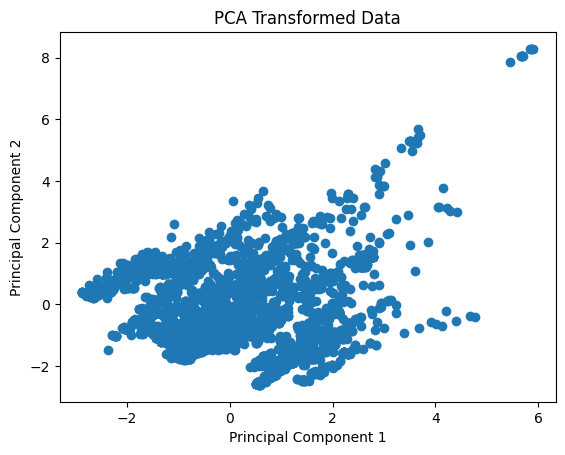

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Transformed Data')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming you have already loaded X_pca and y

# Split the transformed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Ensure that y has at least two classes
# Example: Converting boolean values to integers
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Create a Logistic Regression model instance
logreg = LogisticRegression()

# Fit the model on the training data
logreg.fit(X_train, y_train)

# Predict using the model
y_pred = logreg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Accuracy: 0.9875283446712018


In [ ]:
from sklearn.metrics import classification_report

# Calculate classification report
class_report = classification_report(y_test, y_pred, target_names=["False", "True"])
print("Classification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

       False       0.99      1.00      0.99       871
        True       0.00      0.00      0.00        11

    accuracy                           0.99       882
   macro avg       0.49      0.50      0.50       882
weighted avg       0.98      0.99      0.98       882



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import cohen_kappa_score

# Calculate Cohen's Kappa score
kappa = cohen_kappa_score(y_test, y_pred)
print("Cohen's Kappa Score:", kappa)


Cohen's Kappa Score: 0.0


year         0
month        0
day          0
hour         0
minute       0
second       0
moisture0    0
moisture1    0
moisture2    0
moisture3    0
moisture4    0
irrgation    0
dtype: int64
Explained Variance Ratio: [0.21045103 0.18325989]


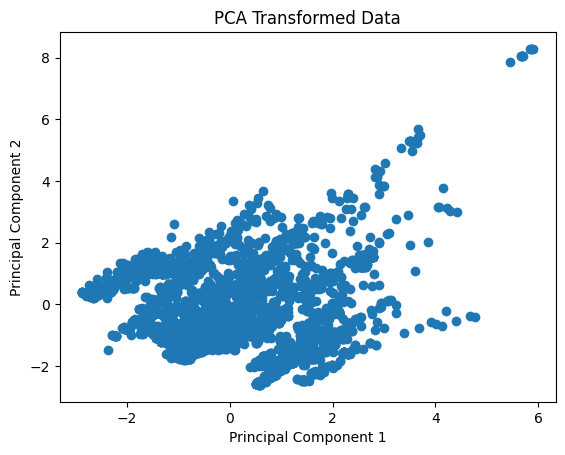

PCA Accuracy: 0.9909297052154195


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#overall code in short

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the data
data = pd.read_csv("plant_vase1.csv")

# Check for missing values
print(data.isnull().sum())

# Handle missing values by dropping rows
data.dropna(inplace=True)

# Input dataset (features)
X = data.drop(columns=['irrgation'])

# Output dataset (target)
y = data['irrgation']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

# Visualize PCA transformed data
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Transformed Data')
plt.show()

# Convert target to integers
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Create and fit a Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predict using the model
y_pred = logreg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("PCA Accuracy:", accuracy)
